# Data Preprocessing

In [47]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler
from IPython.display import display # Just for solution

# load garments_worker_productivity.csv dataset
df = pd.read_csv('data.csv')
# drop the column id
df = df.drop(columns=['id'])
# for each of the categorical attributes, print out all the unique elements.
print("Unique elements of categorical attributes:")
cats = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']
for cat in cats:
    print(df[cat].unique()) 

# Find and print out which columns/attributes that have empty values, e.g., NA, NaN, null, None.
print("\nColumns with empty values: ", df.columns[df.isna().any()])
# Fill BMI with mean
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())
print(df.shape)

# For each of the categorical attribtues, encode the set of categories to be 0 ~ (n_classes - 1)
df = pd.DataFrame(preprocessing.OrdinalEncoder().fit_transform(df), columns=df.columns)

display(df.head(5))

Unique elements of categorical attributes:
['Male' 'Female' 'Other']
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
[1 0]

Columns with empty values:  Index(['bmi'], dtype='object')
(5110, 11)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,88.0,0.0,1.0,1.0,2.0,1.0,3850.0,240.0,1.0,1.0
1,0.0,82.0,0.0,0.0,1.0,3.0,0.0,3588.0,162.0,2.0,1.0
2,1.0,101.0,0.0,1.0,1.0,2.0,0.0,2483.0,199.0,2.0,1.0
3,0.0,70.0,0.0,0.0,1.0,2.0,1.0,3385.0,218.0,3.0,1.0
4,0.0,100.0,1.0,0.0,1.0,3.0,0.0,3394.0,113.0,2.0,1.0


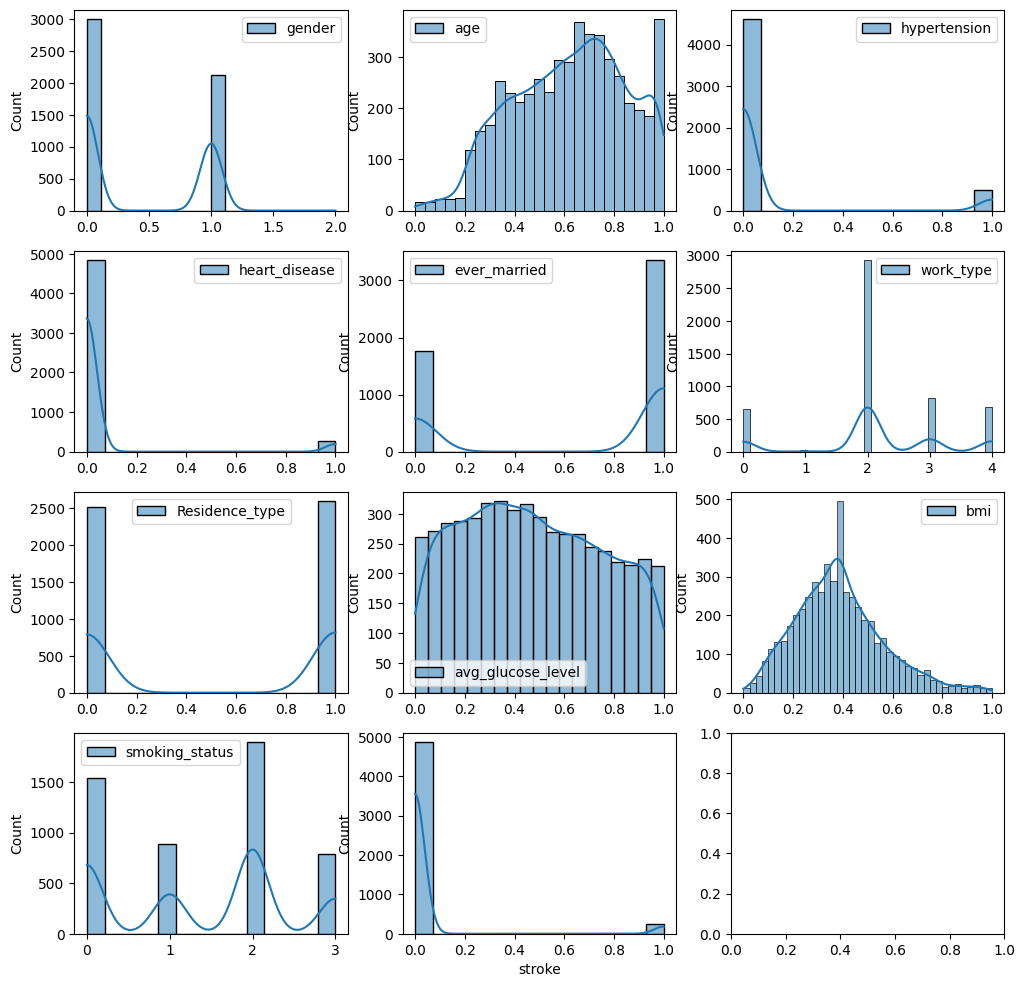

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

X = df.drop('stroke', axis = 1)
y = df['stroke']

# normalize each field of the input data using the min-max normalization technique.
num = ["age", "avg_glucose_level", "bmi"]
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X[num])
X_scaled = pd.DataFrame(data=X_scaled, columns=num)

X[num] = X_scaled

# plot the distribution of data
fig, axes = plt.subplots(4,3, figsize=(12,12))
axes = axes.flatten()

# Loop to create subplots
i = 0
for item in X.items():
    sns.histplot(item, kde=True, ax=axes[i])
    i+=1

# create subplot for stroke
sns.histplot(y, kde=True, ax=axes[len(X.columns)])

plt.show()

# Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import RandomOverSampler

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply oversampling
ros = RandomOverSampler()
x_os, y_os = ros.fit_resample(X_train, y_train)
print(y_os.value_counts())

# Create a RandomForestClassifier with balanced class weights
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Grid Search with recall focused scoring
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, None],
}

grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='recall', n_jobs=-1, verbose=2)
grid_search.fit(x_os,y_os)

# Best model
best_rf = grid_search.best_estimator_

# Prediction and Evaluation
y_pred = best_rf.predict(X_test)
print(classification_report(y_test, y_pred))

# Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

stroke
0.0    3901
1.0    3901
Name: count, dtype: int64
Fitting 3 folds for each of 9 candidates, totalling 27 fits
              precision    recall  f1-score   support

         0.0       0.96      0.91      0.93       960
         1.0       0.21      0.37      0.27        62

    accuracy                           0.88      1022
   macro avg       0.58      0.64      0.60      1022
weighted avg       0.91      0.88      0.89      1022

Accuracy: 0.87573385518591


# Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Define the model
cls = LogisticRegression()

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  # Algorithms to use in the optimization problem
    'max_iter': [100, 200, 300, 400, 500]  # Maximum number of iterations taken for the solvers to converge
}

# Define GridSearchCV
grid_search = GridSearchCV(cls, param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model
grid_search.fit(x_os, y_os)

# Best parameters
best_params = grid_search.best_params_

# Predict using the best model
best_cls = grid_search.best_estimator_
y_pred = best_cls.predict(X_test)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.74      0.85       960
         1.0       0.17      0.81      0.28        62

    accuracy                           0.75      1022
   macro avg       0.58      0.78      0.56      1022
weighted avg       0.93      0.75      0.81      1022

Accuracy: 0.7475538160469667
